# Data Science Internship at Data Glacier

## Final Project: Predicting the persistency of a drug (Healthcare) - Part 3

#### Problem Description

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

With an objective to gather insights on the factors that are impacting the persistency, a classification
model will be built for the given dataset.

***1. Loading the packages and dataset***

In [96]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=15e67197b0405be8e09502b3931122f105dcc42e7f0e18

In [98]:
# Loading package
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import LabelEncoder

<ipython-input-98-6205ba6ece41>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [99]:
# Loading the dataset
main_dataset = pd.read_excel("Healthcare_dataset.xlsx", sheet_name="Dataset")

***2. Creating an statistical summary***

In [106]:
# Profile Report
pandas_profiling.ProfileReport(main_dataset)
# There are no null and duplicate values present in the data
list_duplicated_values_boolean=main_dataset.duplicated()
print("This actually is an indicator of Duplicated rows if present it is going to return true or else false:",True in list_duplicated_values_boolean)

This actually is an indicator of Duplicated rows if present it is going to return true or else false: False


As mentioned in a previous report, the dataset does not contain NA values and duplicated registers. However, a few outliers were observed in both numerical variables. Let's first plot a boxplot, considering the target classes separately. After that, as all outliers were high values, the upper limit threshold was calculated based on the rule 1.5 times the interquartile range (IQR). Any value above this treshold was considered outlier as presented in the boxplots. The outlier values were replaced by these upper limit thresholds.

***3. Treating outliers***

* Dexa_Freq_During_Rx

0.0 3.0
The inter quartile range of the dexa_freq_During_Rx entire data regardless of output label is :3.0
The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :-4.5 The uppper bound of the dexa_freq_During_Rx data is :7.5


<Axes: xlabel='Dexa_Freq_During_Rx'>

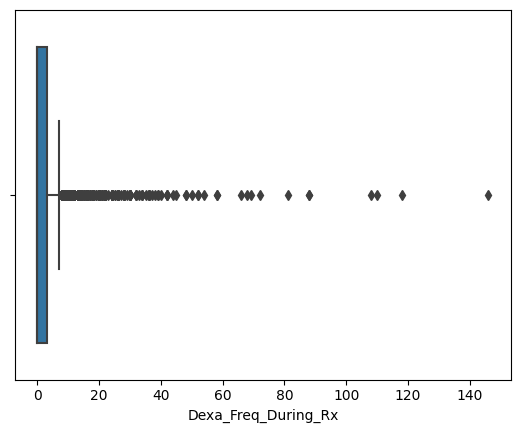

In [44]:
# Ploting the boxplot for Dexa_Freq_During_Rx
q1,q2=np.percentile(main_dataset['Dexa_Freq_During_Rx'],[25,75])
print(q1,q2)
IQR=q2-q1
print("The inter quartile range of the dexa_freq_During_Rx entire data regardless of output label is :{inter}".format(inter=IQR))
lower_bound=q1-(1.5*IQR)
upper_bound=q2+(1.5*IQR)
print("The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :{lower}".format(lower=lower_bound),"The uppper bound of the dexa_freq_During_Rx data is :{upper}".format(upper=upper_bound))
sns.boxplot(x=main_dataset['Dexa_Freq_During_Rx'])

The Inter Quartile Range of  dexa frequency values for persistency is 3.0
The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :-13.5
The upper bound of the dexa_freq_During_Rx data is :22.5


<Axes: xlabel='Dexa_Freq_During_Rx'>

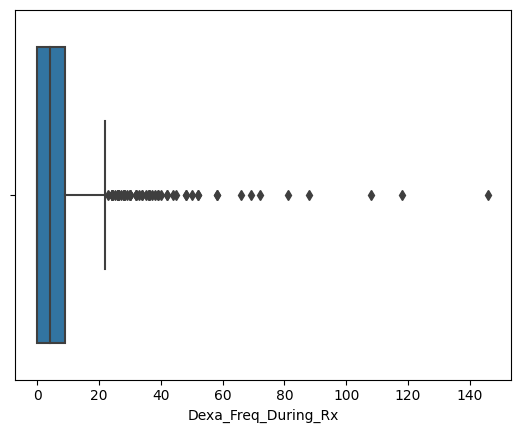

In [78]:
#Plot the Dexa freq values where persistencyflag==Persistent
number_of_persistent_values_in_Dexa=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
q1,median,q2= np.percentile(number_of_persistent_values_in_Dexa['Dexa_Freq_During_Rx'],[25,50,75])

IQR_Persistent=q2-q1
print("The Inter Quartile Range of  dexa frequency values for persistency is {Pers}".format(Pers=IQR))
lower_bound_pers=q1-(1.5*IQR_Persistent)
upper_bound_pers=q2+(1.5*IQR_Persistent)
print("The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :{lower}".format(lower=lower_bound_pers))
print("The upper bound of the dexa_freq_During_Rx data is :{upper}".format(upper=upper_bound_pers))
sns.boxplot(x=number_of_persistent_values_in_Dexa['Dexa_Freq_During_Rx'])


The Inter Quartile Range of  dexa frequency values for persistency is 3.0
The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :0.0
The upper bound of the dexa_freq_During_Rx data is :0.0


<Axes: xlabel='Dexa_Freq_During_Rx'>

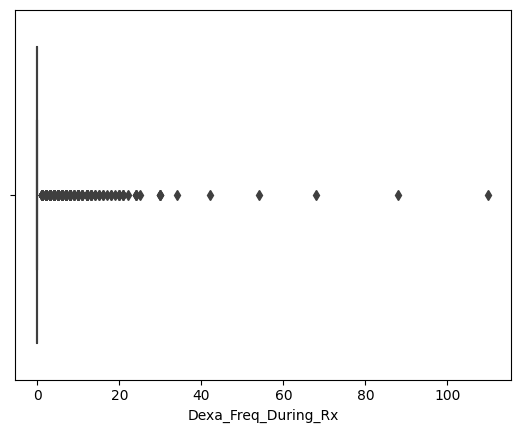

In [79]:
#Plot the Dexa freq values where persistencyflag==Non-Persistent

number_of_non_persistent_values_in_Dexa=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
q1,q2= np.percentile(number_of_non_persistent_values_in_Dexa['Dexa_Freq_During_Rx'],[25,75])
IQR_Non_Persistent=q2-q1
print("The Inter Quartile Range of  dexa frequency values for persistency is {Pers}".format(Pers=IQR))
lower_bound_Non_pers=q1-(1.5*IQR_Non_Persistent)
upper_bound_Non_pers=q2+(1.5*IQR_Non_Persistent)
print("The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :{lower}".format(lower=lower_bound_Non_pers))
print("The upper bound of the dexa_freq_During_Rx data is :{upper}".format(upper=upper_bound_Non_pers))
sns.boxplot(x=number_of_non_persistent_values_in_Dexa['Dexa_Freq_During_Rx'])

# Since it is clear that there are outliers present in both values and there is variance observed between the distribution of these two value distributions.
# The outlier values for both Persistent and Non_persistent will be replace by taking the median values of respected distributions and also the median value for Non_persistent data is 0.


The minimum value of Dexa_Freq_During_Rx is 0.0
The maximum value of Dexa_Freq_During_Rx is 22.0
Dexa_Freq_During_Rx               0.0
Persistency_Flag       Non-Persistent
dtype: object


<Axes: xlabel='Dexa_Freq_During_Rx'>

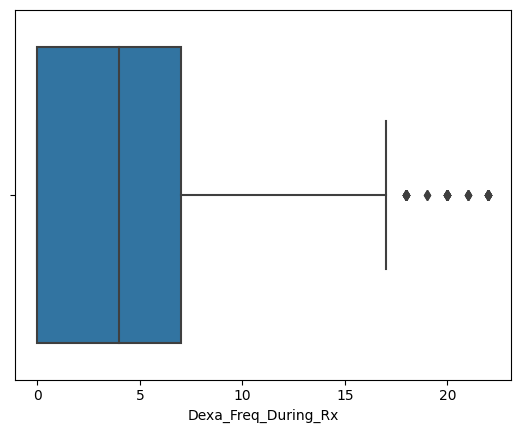

In [80]:
# Dealing with outliers by replacing the outlier values by median of both persistent and non persistent dexa freq values
persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
median_value=persistent_data['Dexa_Freq_During_Rx'].median()
main_dataset['Dexa_Freq_During_Rx'] = np.where((main_dataset['Persistency_Flag'] == 'Persistent') & (main_dataset['Dexa_Freq_During_Rx']>22.5),median_value , main_dataset['Dexa_Freq_During_Rx'])
main_dataset['Dexa_Freq_During_Rx'] = np.where((main_dataset['Persistency_Flag'] == 'Non-Persistent') & (main_dataset['Dexa_Freq_During_Rx']>0),0 , main_dataset['Dexa_Freq_During_Rx'])
print("The minimum value of Dexa_Freq_During_Rx is {min}".format(min=main_dataset['Dexa_Freq_During_Rx'].min()))
print("The maximum value of Dexa_Freq_During_Rx is {max}".format(max=main_dataset['Dexa_Freq_During_Rx'].max()))
persistent1_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
non_persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
print(non_persistent_data[['Dexa_Freq_During_Rx','Persistency_Flag']].max())
#Dexa freq values for persistent
sns.boxplot(x=persistent1_data['Dexa_Freq_During_Rx'])





<Axes: xlabel='Dexa_Freq_During_Rx'>

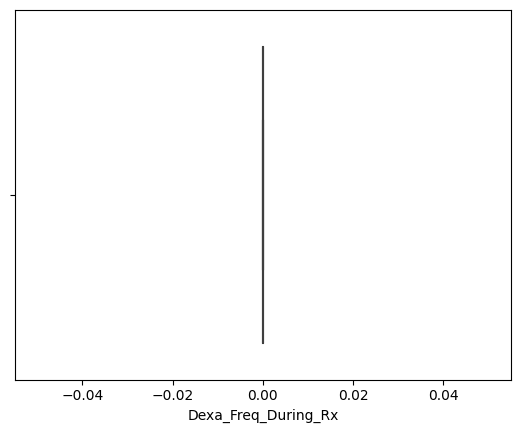

In [81]:
#Dexa freq values for non-persistent
sns.boxplot(x=non_persistent_data['Dexa_Freq_During_Rx'])





*   Count_Of_Risks






The Inter Quartile Range of  count of risks for persistency is 3.0
The lower bound of the count of risks is :-0.5
The upper bound of the count of risks data is :3.5


<Axes: xlabel='Count_Of_Risks'>

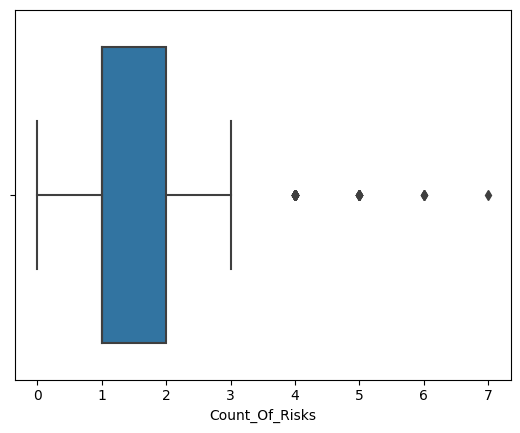

In [82]:
#Plot count of risks for persistent values
number_of_persistent_values_in_count_of_risks=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
q1,median,q2= np.percentile(number_of_persistent_values_in_Dexa['Count_Of_Risks'],[25,50,75])

IQR_Persistent=q2-q1
print("The Inter Quartile Range of  count of risks for persistency is {Pers}".format(Pers=IQR))
lower_bound_pers=q1-(1.5*IQR_Persistent)
upper_bound_pers=q2+(1.5*IQR_Persistent)
print("The lower bound of the count of risks is :{lower}".format(lower=lower_bound_pers))
print("The upper bound of the count of risks data is :{upper}".format(upper=upper_bound_pers))
sns.boxplot(x=number_of_persistent_values_in_Dexa['Count_Of_Risks'])

The Inter Quartile Range of  count of risks values for persistency is 3.0
The lower bound of the count of risksis :-3.0
The upper bound of the count of risks data is :5.0


<Axes: xlabel='Count_Of_Risks'>

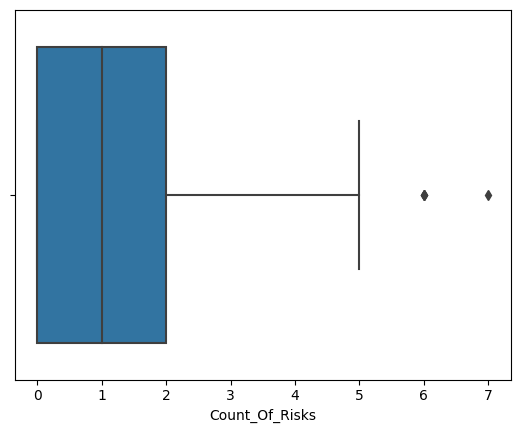

In [83]:
#Plot count of risks for non-persistent values
number_of_non_persistent_values_in_count_of_risks=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
q1,q2= np.percentile(number_of_non_persistent_values_in_count_of_risks['Count_Of_Risks'],[25,75])
IQR_Non_Persistent=q2-q1
print("The Inter Quartile Range of  count of risks values for persistency is {Pers}".format(Pers=IQR))
lower_bound_Non_pers=q1-(1.5*IQR_Non_Persistent)
upper_bound_Non_pers=q2+(1.5*IQR_Non_Persistent)
print("The lower bound of the count of risksis :{lower}".format(lower=lower_bound_Non_pers))
print("The upper bound of the count of risks data is :{upper}".format(upper=upper_bound_Non_pers))
sns.boxplot(x=number_of_non_persistent_values_in_Dexa['Count_Of_Risks'])


The minimum value of Count_Of_Risks is 0.0
The maximum value of Count_Of_Risks is 22.0
Count_Of_Risks                 5.0
Persistency_Flag    Non-Persistent
dtype: object


<Axes: xlabel='Count_Of_Risks'>

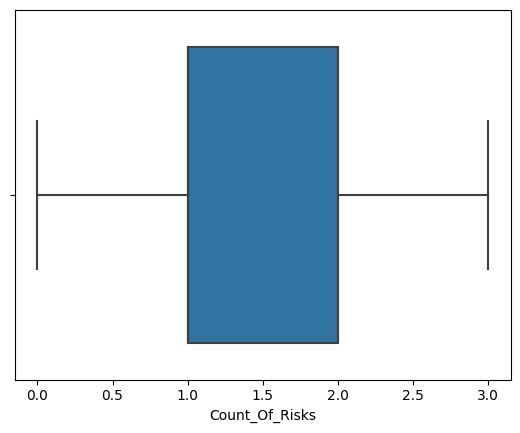

In [84]:
# Similar to previous feature, replacing all outliers with median values of both persistent values
persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
median_value=persistent_data['Count_Of_Risks'].median()
persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
non_persistency_median_value=persistent_data['Count_Of_Risks'].median()
main_dataset['Count_Of_Risks'] = np.where((main_dataset['Persistency_Flag'] == 'Persistent') & (main_dataset['Count_Of_Risks']>3.5),median_value , main_dataset['Count_Of_Risks'])
main_dataset['Count_Of_Risks'] = np.where((main_dataset['Persistency_Flag'] == 'Non-Persistent') & (main_dataset['Count_Of_Risks']>5),non_persistency_median_value, main_dataset['Count_Of_Risks'])
print("The minimum value of Count_Of_Risks is {min}".format(min=main_dataset['Dexa_Freq_During_Rx'].min()))
print("The maximum value of Count_Of_Risks is {max}".format(max=main_dataset['Dexa_Freq_During_Rx'].max()))
persistent1_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
non_persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
print(non_persistent_data[['Count_Of_Risks','Persistency_Flag']].max())
sns.boxplot(x=persistent1_data['Count_Of_Risks'])




<Axes: xlabel='Count_Of_Risks'>

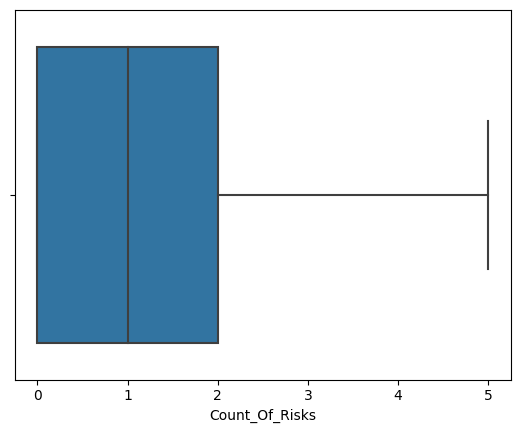

In [85]:
#Boxplot of Count of Risks for Non-persistent values
sns.boxplot(x=non_persistent_data['Count_Of_Risks'])

Both numerical variables do not present outliers. One more transformation that is necessary before proceeding with the exploratory analysis and modeling steps is related to encoding the categorical variables. Let's perform that using the function LabelEncoder from the sklearn.preprocessing.

***4. Encoding categorical variables***

In [101]:
numerical_data_frame=main_dataset[['Dexa_Freq_During_Rx','Count_Of_Risks']]
print(numerical_data_frame.head(10))
main_dataset.drop(['Dexa_Freq_During_Rx','Count_Of_Risks'],axis=1,inplace=True)
print(main_dataset.columns)


   Dexa_Freq_During_Rx  Count_Of_Risks
0                    0               0
1                    0               0
2                    0               2
3                    0               1
4                    0               1
5                    0               2
6                    2               1
7                    0               1
8                    0               1
9                    0               1
Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Scree

In [102]:
main_dataset=main_dataset.apply(LabelEncoder().fit_transform)

***5. Creating the transformed dataset and visualizing it***

In [103]:
# Creating a new dataframe to hold all the transformed variables
transformed_dataframe = pd.concat([pd.DataFrame(main_dataset), pd.DataFrame(numerical_data_frame, columns=['Dexa_Freq_During_Rx','Count_Of_Risks'])], axis=1)

# Vizualizing the new dataframe after transformation
transformed_dataframe.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,1,1,2,1,4,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1111,0,1,1,1,4,0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2222,0,0,3,0,0,1,5,0,1,...,1,0,0,0,0,0,0,0,0,2
3,2758,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2869,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
